In [2]:
import os
import glob

import numpy as np
import pandas as pd

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
dir_base = os.path.join('..','resources','*.csv')

In [4]:
file_list = glob.glob(dir_base)
file_list = sorted(file_list)
file_len = len(file_list)
print(f'Number of files: {file_len}')

Number of files: 10


In [5]:
file_list

['../resources/VENETO_IMERG_mean_beta_3h_cores_01.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_03.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_05.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_10.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_12.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_15.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_17.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_20.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_25.csv',
 '../resources/VENETO_IMERG_mean_beta_3h_cores_28.csv']

In [6]:
DATA = pd.read_csv(file_list[0])
DATA

,Product,Resolution_t,Cores,Time(min),memory
0,IMERG,3h,1,158.199,6.637


In [7]:
cores_list = []
time_list = []
memorry_list = []
for nn in range(file_len):
    DATA = pd.read_csv(file_list[nn])
    cores_list.append(DATA['Cores'].values)
    time_list.append(DATA['Time(min)'].values)
    memorry_list.append(DATA['memory'].values)

In [8]:
cores_levels = []
for nn in range(file_len):
    cores_levels.append(cores_list[nn][0])

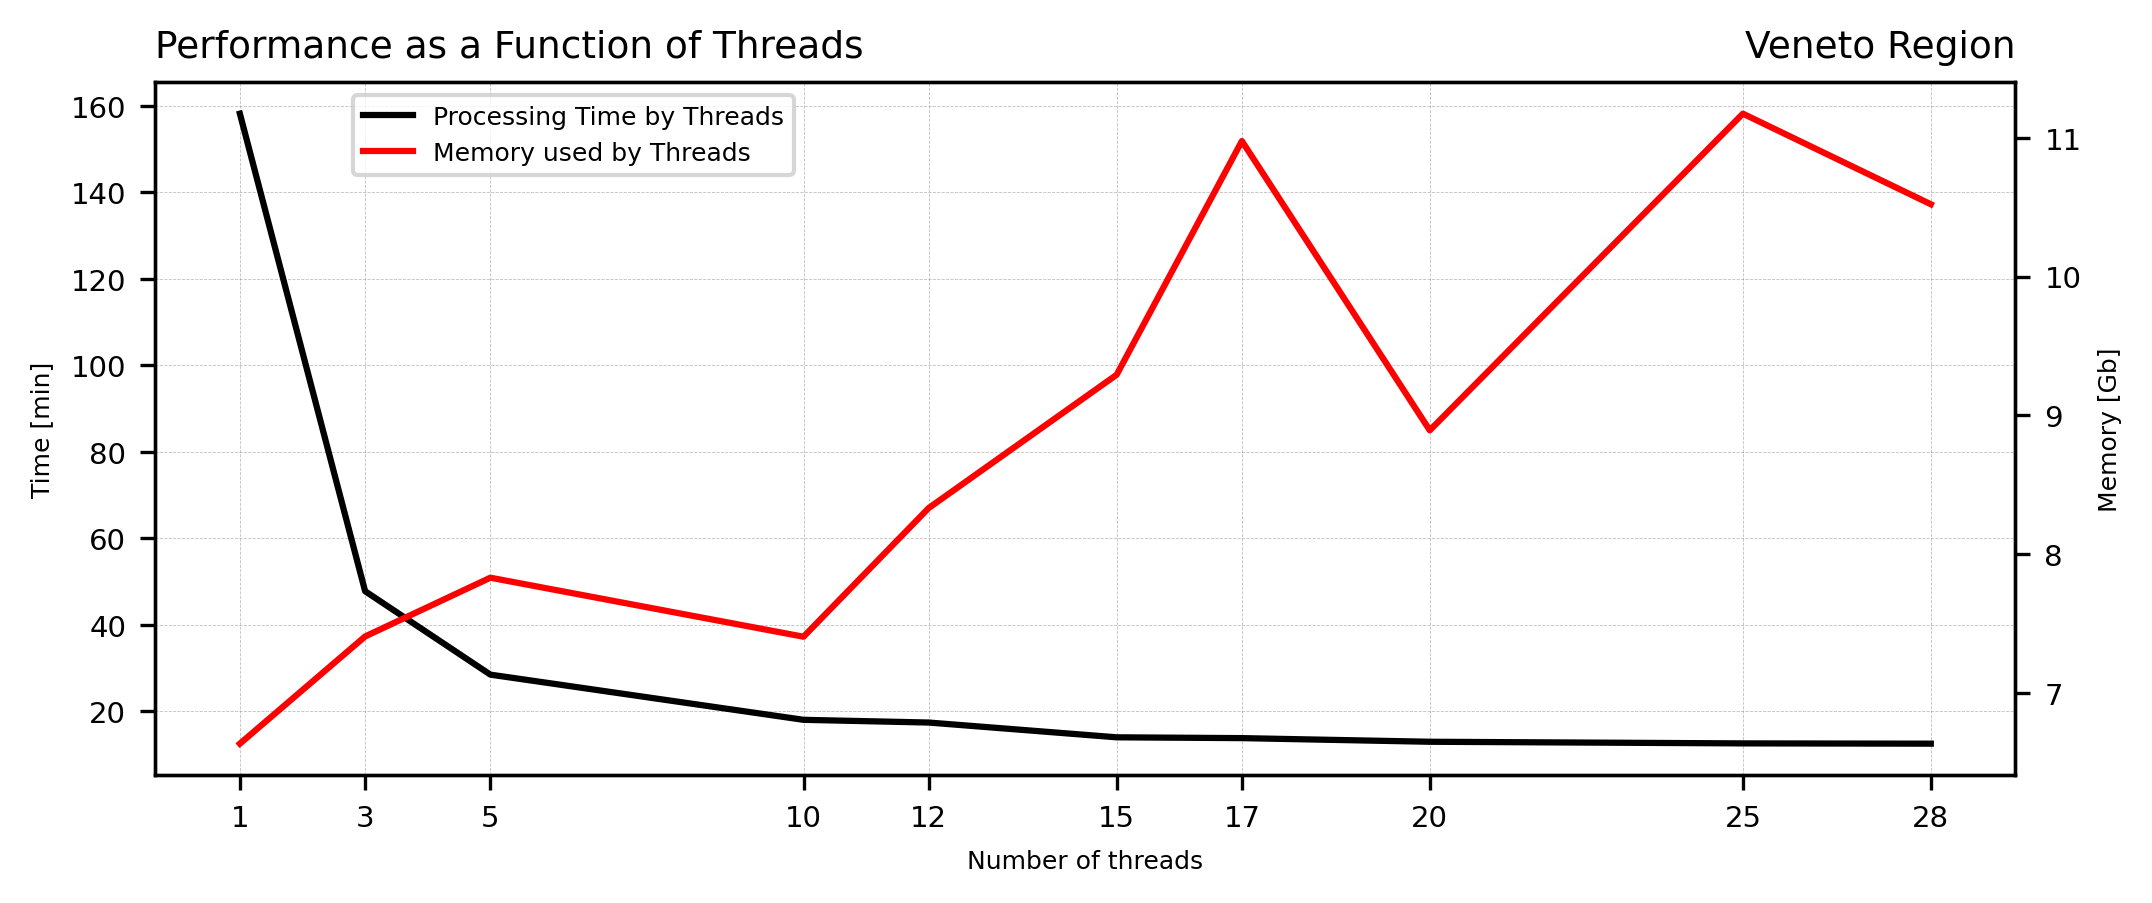

In [25]:
fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,1)

#========================================================================
ax1 = plt.subplot(gs[0, 0])
line1, = ax1.plot(cores_list,time_list,'-k',label='Processing Time by Threads')

ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_ylabel('Time [min]',fontsize=6)
ax1.set_xlabel('Number of threads',fontsize=6)
ax1.set_xticks(cores_levels)

ax2 = ax1.twinx()
line2, = ax2.plot(cores_list,memorry_list,'-r',label='Memory used by Threads')

ax2.set_xticks(cores_levels)
ax2.tick_params(axis='both', which='major', labelsize=7)

ax1.set_title('Performance as a Function of Threads',fontsize=9, loc='left')
ax1.set_title('Veneto Region',fontsize=9, loc='right')
ax2.set_ylabel('Memory [Gb]',fontsize=6)

ax1.grid(linewidth=0.2, linestyle='--', color='gray', alpha=0.5)

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, fontsize=6, bbox_to_anchor=(0.35, 1))
